# Question 1

Considérons le problème
\begin{align*}
\min_{x, y}\ & x+y \\
\text{tel que } & x - y = 1 \\
& -y = 0\\
x, y\geq 0\\
\end{align*}
Résolvez le problème en appliquant la méthode à deux phases.
Que pouvez-vous en conclure?

## Solution


Notons que le problème a pour solution triviale $(1,0)$.
Appliquons néanmoins la phase 1, en construisant le problème artificiel
\begin{align*}
\min_{x, y, s_1, s_2}\ & s_1+s_2 \\
\text{tel que } & x - y + s_1 = 1 \\
& -y + s_2 = 0\\
x, y, s_1, s_2 \geq 0\\
\end{align*}
Le tableau du simplexe donne
$$
\begin{matrix}
1 & -1 & 1 & 0 & 1 \\
0 & -1 & 0 & 1 & 0 \\
0 & 0 & 1 & 1 & 0
\end{matrix}
$$
apres anulation des couts reduits, on a
$$
\begin{matrix}
1 & -1 & 1 & 0 & 1 \\
0 & -1 & 0 & 1 & 0 \\
-1 & 2 & 0 & 0 & -1
\end{matrix}
$$
Dès lors $x$ entre la base et $s_1$ en sort.
Après pivot, nous avons
$$
\begin{matrix}
1 & -1 & 1 & 0 & 1 \\
0 & -1 & 0 & 1 & 0 \\
0 & 1 & 1 & 0 & 0
\end{matrix}
$$
Le simplexe s'arrête donc avec la solution de base $x = 1$, $s_2 = 0$, et la valeur optimale $0$ pour le problème artificielle.
$y$ n'est pas dans la solution de base, mais le problème est néanmoins réalisable car la fonction objectif du problème artificielle est nulle, ce qui est possible car la solution trouvée est dégénérée. Comme $y$ est hors base, $y = 0$ et donc nous avons comme solution réalisable du problème original $(1,0)$.
On peut faire un pivot pour faire entrer $y$ dans la base et sortir $s_2$. Le pivot donne le tableau
$$
\begin{matrix}
1 & 0 & 1 & -1 & 1 \\
0 & 1 & 0 & -1 & 0 \\
0 & 0 & 1 & 1 & 0
\end{matrix}
$$
Si on part de ce tableau pour le problème de départ, nous obtenons
$$
\begin{matrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 1 & 0
\end{matrix}
$$
et après annulation des coûts réduits
$$
\begin{matrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 0 & -1
\end{matrix}
$$
Nous retrouvons bien la solution optimale $(1,0)$.

## Meilleure solution

Nous avons ignoré le fait que $x$ est une variable isolée. En exploitant ce point, nous contruisons le problème artificiel
\begin{align*}
\min_{x, y, s}\ & s \\
\text{tel que } & x - y = 1 \\
& -y + s = 0\\
&x, y, s\geq 0 \\
\end{align*}
Le tableau du simplexe donne alors
$$
\begin{matrix}
1 & -1 & 0 & 1 \\
0 & -1 & 1 & 0 \\
0 & 0 & 1 & 0
\end{matrix}
$$
et après annulation du coût réduit de $s$,
$$
\begin{matrix}
1 & -1 & 0 & 1 \\
0 & -1 & 1 & 0 \\
0 & 1 & 0 & 0
\end{matrix}
$$

Tous les coûts réduits sont positifs, et on retrouve la solution $x = 1$, $s = 0$. À nouveau, $y$ n'est pas dans la base, qui est cependant dégénérée, et comme précédemment, nous pouvons effectuer un pivot pour l'insérer.

$$
\begin{matrix}
1 & 0 & -1 & 1 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & 0
\end{matrix}
$$

La phase 2 se déroule alors comme précédemment.

# Question 2: intra A05

Soit le problème suivant
\begin{align*}
&\min\ z = -8x-6y\\
\text{s.à. }
& 5x + 3y \le 30,\\
&x+3y \le 18,\\
& x,y \ge 0.
\end{align*}

## (a)

$\textbf{Résoudre le problème graphiquement.
}$

In [1]:
using Plots

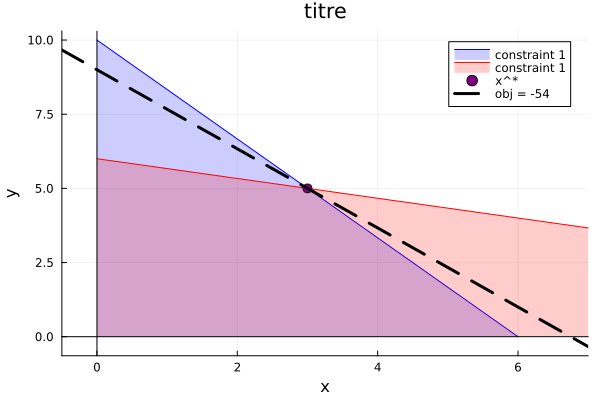

In [2]:
plot(t->(30-5*t)/3, 0, 6, color = :blue, fill = (0, 0.2, :blue), label = "constraint 1")
plot!(t->(18-t)/3, 0, 18, color = :red, fill = (0, 0.2, :red), label = "constraint 1")
plot!(xlims = (-0.5, 7))
vline!([0], color = :black, label = "")
hline!([0], color = :black, label = "")
scatter!([3],[5], color = :purple, markersize = 5, label = "x^*")
plot!(xlabel = "x", ylabel = "y")
plot!(title = "titre")
plot!(t -> (8*3+6*5 -8*t)/6, color = :black, linewidth = 3, linestyle = :dash, label = "obj = -$(8*3+6*5)")

## (b)

$\textbf{Résoudre le problème avec la méthode du simplexe.
}$

Avant de résoudre le problème avec le simplexe, il faut le mettre sous forme standard.
\begin{align*}
&\min\ z = -8x-6y\\
\text{s.a. } & 5x + 3y + s_1 = 30,\\
&x+3y + s_2 = 18,\\
& x,y,s_1,s_2 \ge 0.
\end{align*}

\begin{align*}
\begin{array}{c|cccc|c}
    & x & y & s_1 & s_2 & \text{t.d.}\\
\hline
s_1 & \color{red}5 & 3 & 1 & 0 & 30\\
s_2 & 1 & 3 & 0 & 1 & 18\\
\hline
-z & -8 & -6 & 0 & 0 & 0
\end{array}
\end{align*}

$x$ entre et $s_1$ sort

\begin{align*}
\begin{array}{c|cccc|c}
    & x & y & s_1 & s_2 & \text{t.d.}\\
\hline
x & 1 & 3/5 & 1/5 & 0 & 6\\
s_2 & 0 & \color{red}{12/5} & -1/5 & 1 & 12\\
\hline
-z  & 0 & -6/5 & 8/5 & 0 & 48
\end{array}
\end{align*}

$y$ entre et $s_2$ sort

\begin{align*}
\begin{array}{c|cccc|c}
    & x & y & s_1 & s_2 & \text{t.d.}\\
\hline
x & 1 & 0 & 1/4 & -1/4 & 3\\
y & 0 & 1 & -1/12 & 5/12 & 5\\
\hline
-z & 0 & 0 & 3/2 & 1/2 & 54
\end{array}
\end{align*}

La solution obtenue est $x = 3$, $y=5$, $s_1 = s_2 = 0$ et la valeur optimale est $z^{\star} = -54$.

## (c)

$\textbf{Trouver l'inverse de la base optimale.
}$

L'inverse de la base optimale $B_{\star}^{-1} $ se lit directement dans le
dernier tableau du simplexe sous les colonnes associées au variable d'écart $s_1$
et $s_2$ introduites.
\begin{align*}
B_{\star}^{-1} =
\begin{pmatrix}
1/4 & -1/4\\
-1/12 & 5 /12
\end{pmatrix}
\end{align*}

## (d)

$\textbf{Trouver le vecteur des multiplicateurs pour la base optimale.
}$

Le vecteur des multiplicateurs se lit au signe près directement dans le dernier tableau du simplexe, les coûts
réduits des variables d'écarts. Autrement, si on note $\pi$ le vecteur des multiplicateurs optimaux, on rappelle
que $\pi = C_{B} B_{\star}^{-1}$ où $c_{B_\star} = \left(c_x, c_y \right) = \left(-8, -6 \right)$.
Ainsi, $\pi = \left(-3/2, -1/2 \right)$

On a 

$$
r^T = c^T - \pi A
$$

Si on regarde sous les variables d'écarts $S = [s_1, s_2]$, on a 

\begin{align*}
r_S^T &= c_S^T - \pi A_S\\
r_S^T &= 0^T - \pi I\\
\begin{pmatrix}
\frac{3}{2} & \frac{1}{2}
\end{pmatrix} &= -\pi\\
\pi &= \begin{pmatrix}
-\frac{3}{2} & -\frac{1}{2}
\end{pmatrix}\\
\end{align*}
Avec $A_S$ la matrice créé en prenant les colonnes de $A$ associés aux variables $S = [s_1, s_2]$

## (e)

$\textbf{Est-ce que la base reste optimale si on change le terme de droite pour
}$
\begin{align*}
\tilde{b} = 
\begin{pmatrix}
24\\
18
\end{pmatrix}?
\end{align*}

$B_{\star}^{-1} $ reste réalisable si $B_{\star}^{-1} \tilde{b} \ge 0$.
\begin{align*}
B_{\star}^{-1} \tilde{b} = 
\begin{pmatrix}
3/2\\
11/2
\end{pmatrix}
\end{align*}
Les coûts réduits associées à cette base n'ont pas été modifiés. Il restent positifs et $B_{\star} $ demeure optimale.
La nouvelle valeur optimale est $\tilde{z} = -45$.


## (f)

$\textbf{Est-ce que la base reste optmimale si on change le terme de droite pour
}$
\begin{align*}
\bar{b} = 
\begin{pmatrix}
30\\
16
\end{pmatrix}
\end{align*}

$B_{\star}^{-1} $ reste réalisable si $B_{\star}^{-1} \tilde{b} \ge 0$.
\begin{align*}
B_{\star}^{-1} \bar{b} = 
\begin{pmatrix}
7/2\\
25/6
\end{pmatrix}
\end{align*}
Les coûts réduits associés à cette base n'ont pas été modifié. Il restent positifs. $B_{\star} $ demeure 
optimale. La nouvelle valeur optimale est $\bar{z} = -53$.


## (g)

$\textbf{Ajoutons une nouvelle contrainte au problème qui devient alors}$
\begin{align*}
&\min\ z = -8x-6y\\
\text{s.a. } & 5x + 3y + s_1 = 30,\\
&x+3y+ s_2 = 18,\\
&y + s_3 = 5,\\
& x,y,s_1,s_2,s_3 \ge 0.
\end{align*}
$\textbf{Quelle est maintenant la solution de ce problème?}$

On peut recalculer la solution.

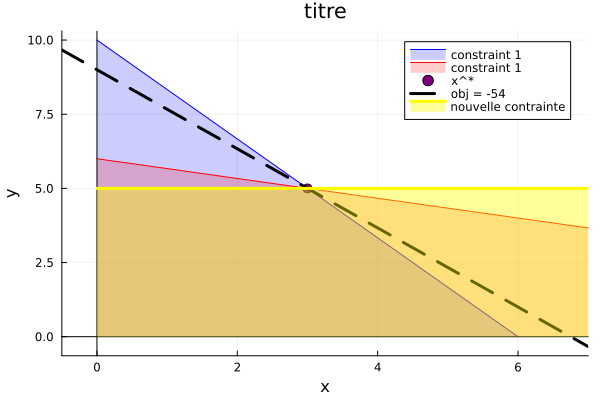

In [3]:
#graphiquement

plot!(t -> 5, 0, 100, color = :yellow, linewidth = 3, fill = (0, 0.4, :yellow), label = "nouvelle contrainte")

Au lieu de reprendre le simplexe, on exploite l'information associé à $B_{\star} $.
Pour ce nouveau problème, une base est de rang $3$. La nouvelle base est


\begin{align*}
\tilde{B} = 
\begin{pmatrix}
5 & 3 & 0\\
1 & 3 & 0\\
0 & 1 & 1\\
\end{pmatrix}
\end{align*}
où les colonnes de $\tilde{B}$ sont associées aux variables $x, y, s_3$.

Au lieu d'inverser $\tilde{B}$ puis de retrouver le tableau à partir du dernier tableau de la partie b, 
on retrouvera le tableau associé à $\tilde{B}$.

\begin{align*}
\begin{array}{c|ccccc|c}
    & x & y & s_1 & s_2 & s_3 & \text{t.d.}\\
\hline
x & 1 & 0 & 1/4 & -1/4 & 0 & 3\\
y & 0 & 1 & -1/12 & 5/12 & 0 & 5\\
s_3 & 0 & 1 & 0 & 0 & 1 & 5\\
\hline
-z & 0 & 0 & 3/2 & 1/2 & 0 & 54
\end{array}
\end{align*}

Pour respecter le fait que $y$ est une variable de base, il faut rendre $y$ isolé, ce qui peut être obtenu en modifiant le tableau ainsi
\begin{align*}
\begin{array}{c|ccccc|c}
  & x & y & s_1 & s_2 & s_3 & \text{t.d.} \\
\hline
x & 1 & 0 & 1/4 & -1/4 & 0 & 3\\
y & 0 & 1 & -1/12 & 5/12 & 0 & 5\\
s_3 & 0 & 0 & 1/12 & -5/12 & 1 & 0 \\
\hline
-z & 0 & 0 & 3/2 & 1/2 & 0 & 54
\end{array}
\end{align*}

La solution obtenue est $x = 3$, $y=5$, $s_1 = s_2 = s_3 = 0$ et la valeur optimale est $z^{\star} = -54$.

Autrement dit, la solution optimale n'a pas changé. Aurait-on pu le voir plus simplement?

OUi, car quand on ajoute une contrainte au problème, deux situations peuvent arriver:
la solution optimale trouvée précédemment reste réalisable. Dans ce cas, la solution reste optimale quand avant la nouvelle contrainte, aucune solution non-réalisable ne devient réalisable.
la solution optimale trouvée précédemment n'est plus réalisable. Alors, il faut calculer la nouvelle solution optimale. Le plus efficace est alors d'utiliser le simplexe dual, qui sera vu plus tard dans le cours.

On est dans le cas 1. La solution optimale précédemment trouvée reste optimale.

# Question 3
$\textbf{Utiliser le simplexe révisé pour résoudre}$
\begin{align*}
&\min\ z = -4x_1 -3x_2 - x_3 -2x_4\\
\text{s.a. }
& 4x_1 + 2x_2 + x_3 + x_4 + x_5 = 5.\\
&3x_1 + x_2 + 2x_3 +x_4 +x_6 = 4.\\
&x_j \ge 0,\ j=1,\ldots,6.
\end{align*}

Soient
\begin{align*}
A=
\begin{pmatrix}
4 & 2 & 1 & 1 & 1 & 0 \\
3 & 1 & 2 & 1 & 0 & 1
\end{pmatrix}, \quad
b = 
\begin{pmatrix}
5\\4
\end{pmatrix}
\end{align*}

$\textbf{Itération 1}$

Soit 
\begin{align*}
B_0^{-1} =
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix},
\end{align*}
Pour commencer, on trouve le nouveau multiplicateur $\pi$ et on calcule les coûts réduits
\begin{gather*}
\pi_0^t = c_B^tB_0^{-1} = 
\begin{pmatrix}
0 & 0
\end{pmatrix}\\[6pt]
\bar{c}^t = c^t - \pi_0^t A = 
\begin{pmatrix}
-4 & -3 & -1 & -2 & 0 & 0
\end{pmatrix}
\end{gather*}

La variable d'entrée est donc $x_1$.
Pour trouver la variable de sortie, on a besoin de la colonne de $A$ associée à $x_1$ que l'on notera $A_1$.
\begin{align*}
\bar{A}_1 = B_0^{-1} A_1 = 
\begin{pmatrix}
4\\
3
\end{pmatrix}
\end{align*}
Comme $\min\left\{5/4, 4/3 \right\} = 5/4$, $x_5$ sort de la base.
On met à jour $B_0^{-1} $ et en même temps on met à jour les termes de droite et la valeur de l'objectif

\begin{align*}
\begin{array}{ccccc}
    & x_5 & x_6 & b & x_1\\
x_5 & 1 & 0 & 5 & {\color{red}4}\\
x_6 & 0 & 1 & 4 & 3\\
-z & 0 & 0 & 0 & -4
\end{array}
\end{align*}
On fait un pivot
\begin{align*}
\begin{array}{cccc}
 & x_5 & x_6 & b \\
x_1 & 1/4 & 0 & 5/4\\
x_6 & -3/4 & 1 & 1/4\\
-z  & 1 & 0 & 5
\end{array}
\end{align*}
On a maintenant 
\begin{align*}
B_1^{-1} =
\begin{pmatrix}
1/4 & 0\\
-3/4 & 1
\end{pmatrix}
\end{align*}
et on recommence une nouvelle itération.

$\textbf{Itération 2}$

Pour commencer, on trouve le nouveau multiplicateur $\pi$ et on calcul les coûts réduits
\begin{gather*}
\pi_1^t = c_B^tB_1^{-1} = 
\begin{pmatrix}
-1 & 0
\end{pmatrix}\\[6pt]
\bar{c}^t = c^t - \pi_1^t A = 
\begin{pmatrix}
0 & -1 & 0 & -1 & 1 & 0
\end{pmatrix}
\end{gather*}

Prenons $x_2$ comme variable d'entrée.
Pour trouver la variable de sortie, on a besoin de la colonne de $A$ associée à $x_2$ que l'on notera $A_2$.
\begin{align*}
\bar{A}_2 = B_1^{-1} A_2 = 
\begin{pmatrix}
1/2\\
-1/2
\end{pmatrix}
\end{align*}
Et $\min\left\{ (5/4)*2 \right\} = 5/2$, alors $x_1$ sort de la base.
On met à jour $B_1^{-1} $ et en même temps on met à jour les termes de droite et la valeur de l'objectif

\begin{align*}
\begin{array}{ccccc}
    & x_5 & x_6 & b & x_2\\
x_1 & 1/4 & 0 & 5/4 & \color{red}{1/2}\\
x_6 & -3/4 & 1 & 1/4 & -1/2\\
-z & 1 & 0 & 5 & -1
\end{array}
\end{align*}
On fait un pivot
\begin{align*}
\begin{array}{cccc}
 & x_5 & x_6 & b \\
x_2 & 1/2 & 0 & 5/2\\
x_6 & -1/2 & 1 & 3/2\\
-z  & 3/2 & 0 & 15/2
\end{array}
\end{align*}
On a maintenant 
\begin{align*}
B_2^{-1} =
\begin{pmatrix}
1/2 & 0\\
-1/2 & 1
\end{pmatrix}
\end{align*}
et on recommence une nouvelle itération.

$\textbf{Itération 3}$
Pour commencer, on trouve le nouveau multiplicateur $\pi$ et on calcul les coûts réduits
\begin{gather*}
\pi_2^t = c_B^tB_2^{-1} = 
\begin{pmatrix}
-3/2 & 0
\end{pmatrix}\\[6pt]
\bar{c}^t = c^t - \pi_2^t A = 
\begin{pmatrix}
2 & 0 & 1/2 & -1/2 & 3/2 & 0
\end{pmatrix}
\end{gather*}

La variable d'entrée est donc $x_4$.
Pour trouver la variable de sortie, on a besoin de la colonne de $A$ associée à $x_4$ que l'on notera $A_4$.
\begin{align*}
\bar{A}_4 = B_2^{-1} A_4 = 
\begin{pmatrix}
1/2\\
1/2
\end{pmatrix}
\end{align*}
Et $\min\left\{5, 3 \right\} = 3$, alors $x_6$ sort de la base.
On met à jour $B_2^{-1} $ et en même temps on met à jour les termes de droite et la valeur de l'objectif

\begin{align*}
\begin{array}{ccccc}
    & x_5 & x_6 & b & x_4\\
x_2 & 1/2 & 0 & 5/2 & 1/2\\
x_6 & -1/2 & 1 & 3/2 & \color{red}{1/2}\\
-z & 3/2 & 0 & 15/2 & -1/2
\end{array}
\end{align*}
On fait un pivot
\begin{align*}
\begin{array}{cccc}
 & x_5 & x_6 & b \\
x_2 & 1 & -1 & 1\\
x_4 & -1 & 2 & 3\\
-z  & 1 & 1 & 9
\end{array}
\end{align*}
On a maintenant 
\begin{align*}
B_3^{-1} =
\begin{pmatrix}
1 & -1\\
-1 & 2
\end{pmatrix}
\end{align*}
et on recommence une nouvelle itération.

$\textbf{Itération 4}$

Pour commencer, on trouve le nouveau multiplicateur $\pi$ et on calcul les coûts réduits
\begin{gather*}
\pi_3^t = c_B^tB_3^{-1} = 
\begin{pmatrix}
-1 & -1
\end{pmatrix}\\[6pt]
\bar{c}^t = c^t - \pi_3^t A = 
\begin{pmatrix}
3 & 0 & 1 & 0 & 1 & 1
\end{pmatrix}
\end{gather*}

Tous les coûts réduits sont positifs. La base $B_3$ est donc optimale. La solution optimale associée à $B_3$ est $x_2 = 1$ et $x_4 = 2$  (variable de base) et $x_1 = x_3 = x_5 = x_6 = 0$ (variable hors base).
La valeur optimale est $-9$.

# Question 4

Question 5 de l'examen intra A2011.

On a le problème suivant
\begin{align*} 
\begin{array}{l c c c c c c c} 
  \min\  z  = &  -3x_1    & - &  x_2   & - &  3x_3  &  &   \\ 
  \text{tel que }   &  2x_1     & + &  1x_2  & + &  x_3   &  \leq  & 2  \\ 
            &  x_1      & + &  2x_2  & + &  3x_3  &  \leq  & 5  \\ 
            &  2x_1     & + &  2x_2  & + &  x_3   &  \leq  & 6  \\ 
            & x_1 && x_2 && x_3 & \geq & 0      \\ 
\end{array} 
\end{align*}

**(a)** Transformez le problème sous forme standard.

**(b)** À une itération du simplexe révisé on obtient 
\begin{equation}
\begin{array}{ccccccc}
x_1 &\frac{1}{2} & 0 & 0 & 1 \\ 
x_5 &\frac{-1}{2} & 1 & 0 & 4 \\ 
x_6 &-1 & 0 & 1 & 4 \\ 
-z &\frac{3}{2} & 0 & 0 & 3 \\ 
\end{array}
\end{equation}
où dans la dernière ligne on a mis **l'opposé du vecteur des multiplicateurs** $\lambda^t$ $\left(\lambda^t=c^t_B B^{-1} \right)$.

Quelle est la base associée à cette itération?

**(c)** En partant du tableau du simplexe révisé en **(b)**, continuer l'algorithme du simplexe révisé jusqu'à l'optimum.

**(d)**
Soit le nouveau coût initial $\hat{c}_2 = c_2+\delta$, où $c_2=-1$ est le coût initial associé à $x_2$. Pour quelle valeur de $\delta$ la solution trvouvée en $\textbf{(b)}$ demeure-t-elle optimale?

## Solution

**(a)** Pour transformer le problème sous forme standard, on introduit des variables d'écarts $x_4$, $x_5$ et $x_6$.

\begin{align*}
\begin{array}{l c c c c c c c c c c c c c}
  \min  z  = &  -3x_1    & - &  x_2   & - &  3x_3  &   &       &   &     &  &      &  &   \\
  \text{tel que }    &  2x_1     & + &  x_2  & + &  x_3   & + &  x_4  &   &     &  &      &= & 2  \\
            &  x_1      & + &  2x_2  & + &  3x_3  &   &       & + & x_5 &  &      &= & 5  \\
            &  2x_1     & + &  2x_2  & + &  x_3   &   &       &   &     & +&  x_6 &= & 6  \\
            &  x_1, && x_2, && x_3, && x_4, && x_5, && x_6 & \geq & 0   
\end{array}
\end{align*}

**(b)**
La base B est composée des colonnes associées aux variables $x_1$, $x_5$ et $x_6$.
$$
B = \begin{pmatrix}
    2 & 0 & 0 \\
    1 & 1 & 0 \\
    2 & 0 & 1
\end{pmatrix}
$$

**(c)**
Pour savoir si nous devons poursuivre la résolution du problème, nous
calculons d'abord les coûts réduits:

Nous disposons dans le tableau de
l'inverse de la base, et du vecteur multiplicateur $\lambda$: $\lambda^t = \left(\frac{-3}{2}, 0, 0 \right)$.

Pour calculer les coûts réduits :

$\bar c^t = c^t - \lambda^t A $ 

$\bar c^t$ = (0, $\frac{1}{2}$, $\frac{-3}{2}$, $\frac{3}{2}$, 0 0)

$\bar c_3 < 0$ la base courante n'est pas optimale. $x_3$ rentre dans la base.

Déterminons la variable de sortie:

$y_3 = B^{-1}A_3$ 

$$
y_3 = \begin{pmatrix}
      1/2  \\
      5/2  \\
      0
\end{pmatrix}
$$
De plus, $\min \left\{ \frac{1}{1/2}, \frac{4}{5/2} \right\} = 8/5$.
Ainsi $x_5$ sort de la base.


\begin{align*}
\begin{array} { c c c c c|  c}
        &    &   &   &   &  y_3  \\
\hline
 x_1    & 1/2 & 0 & 0 & 1 & 1/2  \\
 x_5    & -1/2 & 1 & 0 & 4 & 5/2 \\
 x_6    & -1  & 0 & 1 & 4 &  0 \\
\hline
 -z     & 3/2 & 0 & 0 & 3 & -3/2 \\
\hline
\end{array}
\end{align*}


Les opérations sur les lignes se résument ainsi:
$L'_1 \leftarrow L_1 - \frac{1}{2} L'_2$ \\
$L'_2 \leftarrow \frac{2}{5} L_2$ \\
$L'_3 \leftarrow L_3$ \\
$L'_4 \leftarrow L_4 + \frac{3}{2} L' _2$

Le nouveau tableau du simplexe révisé est donc le suivant:

\begin{align*}
\begin{array}{|c| c c c |c|}
\hline
 x_1  & 3/5  & -1/5 & 0 & 1/5  \\
 x_3  & -1/5 & 2/5  & 0 & 8/5  \\
 x_6  & -1   & 0    & 1 & 4    \\
\hline
 -z   & 6/5  & 3/5  & 0 & 27/5 \\
\hline
\end{array}
\end{align*}

Dès lors,
$$
B^{-1} = \begin{pmatrix}
    3/5 & -1/5 & 0 \\
    -1/5 & 2/5 & 0 \\
    -1 & 0 & 1
\end{pmatrix}
$$
et
$$
\lambda^t = c_b^t B^{-1} = (-6/5 , -3/5, 0).
$$
et nous pouvons calculer les coûts réduits $\bar c^t = c^t - \lambda^tA$:
$$
\bar c^t = (0, 7/5, 0, 6/5, 3/5, 0).
$$
Tous les coûts réduits sont positifs ou nuls. La base courante est donc optimale.
Une solution optimale est donnée par :
$x_1^* = 1/5$, $x_2^* = 0$, $x_3^* = 8/5$, $x_4^* = 0$, $x_5^* = 0$, $x_6^* = 4$, de valeur optimale -27/5.

**(d)**
La solution demeure optimale tant que $(-1 + \delta) - \lambda A_2 \geq 0$.
Alors la solution demeure réalisable pour tout $\delta \geq -7/5$.